#### Load Packages

In [19]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
#import dataset
df = pd.read_csv(r"C:\Users\Sree\Downloads\MSFT.csv")
df.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
248,2023-10-26,340.540009,341.630005,326.940002,327.890015,327.890015,37828500
249,2023-10-27,330.429993,336.720001,328.399994,329.809998,329.809998,29835200
250,2023-10-30,333.410004,339.450012,331.829987,337.309998,337.309998,22811600


#### Stationary Checking

In [21]:
import statsmodels.api
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [22]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
def adf_test(data):
    report = adfuller(data)
    label = ['ADF Statistic','P-value','lags','observation']
    
    for value,label in zip(report,label):
        print(label + " : " + str(value))
        
    if report[1] > 0.05:
        print('It is a non-stationary data')
        
    else:
        print('It is stationary data')

adf_test(df['Close'])

ADF Statistic : -1.4175043033962096
P-value : 0.5738561643647346
lags : 2
observation : 248
It is a non-stationary data


In [24]:
#### make it as stationary
#df['Close'] = df['Close'].diff().dropna()

#### Model

In [25]:
#create the model
Model = ARIMA(df['Close'],order = (5,2,1))

#fit the model
result = Model.fit()

#summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 2, 1)   Log Likelihood                -750.885
Date:                Fri, 17 Nov 2023   AIC                           1515.770
Time:                        20:06:03   BIC                           1540.392
Sample:                             0   HQIC                          1525.681
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0070      0.065      0.108      0.914      -0.120       0.134
ar.L2         -0.2098      0.070     -3.016      0.003      -0.346      -0.073
ar.L3         -0.0302      0.071     -0.427      0.669      -0.169       0.108
ar.L4          0.0069      0.071      0.098      0.922      -0.132       0.146
ar.L5          0.0274      0.073      0.374      0.708      -0.116       0.171
ma.L1         -0.9999      2.095     -0.477      0.633      -5.106       3.107
sigma2        23.7950     49.626      0.479      0.632     -73.470     121.060
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                26.64
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.49
Prob(H) (two-sided):                  0.63   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Prediction

In [26]:
forecast_steps = 5
prediction = result.predict(start = 0,end = len(df)+forecast_steps-1)

#### Plot

In [27]:
x = df['Date'][-100:]
y1 = df['Close'][-100:]
y2 = prediction[-100:]

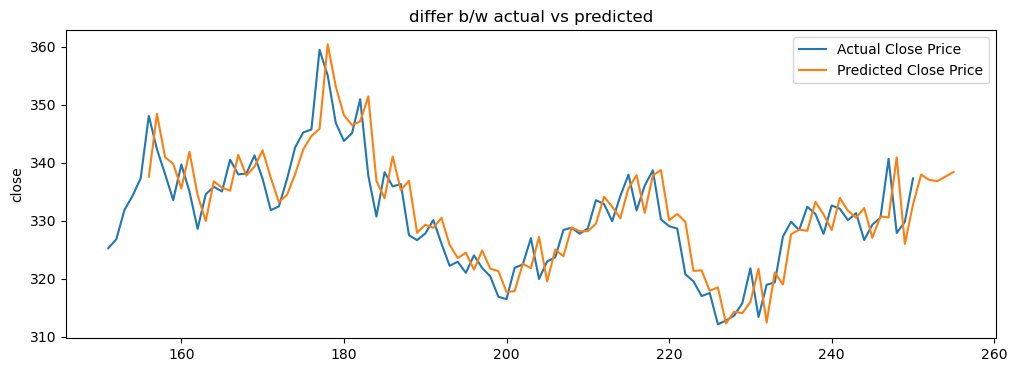

In [28]:
plt.figure(figsize = (12,4))
plt.plot(y1,label = 'Actual Close Price')
plt.plot(y2,label = 'Predicted Close Price')
plt.legend()
plt.xticks()
plt.ylabel('close')
plt.title('differ b/w actual vs predicted')
plt.show()